<b> Toxic Comment Classification </b>


The goal of this project is to create a model that predicts the toxicity type of a
given Wikipedia comment.  This will be done by creating a long short
term memory model using inputs from a dataset containing a list of Wikipedia comments reviewed by human raters.
Each comment can be classified as either toxic, severe toxic, obscene, threat, insult, or identity hate.

Source: https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge

Requirements list (included in submission as .txt file) was loaded using pip.

In [13]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding
from keras.layers import GlobalMaxPool1D
from keras.models import Model

<b> Intro </b>

TenserFlow 2.0, an open-source machine learning platform, was utilized to create a long short
term memory model (LSTM). LSTMs are a type of recurrent neural network and are very powerful in
recognizing patterns and solving sequence prediction problems especially for natural language processing.

Source:

keras.io

pathmind.com/wiki/neural-network

1) Load csv file with list of toxic comments and human classifications.
Create test and training data using 5,000 rows.

In [14]:
dataset = pd.read_csv('train.csv', nrows=5000)

print(dataset.head())

drop_cols = ['comment_text', 'id']
attributes = [col for col in dataset if col not in drop_cols]

list_comment_train = dataset['comment_text']
y = dataset[attributes].values

                 id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0  


2) Tokenize comments so that it may be input to the LSTM model as features.

In [15]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_comment_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_comment_train)


3) Ensure that the features are a fixed length. First, the distribution of word
lengths are analyzed.


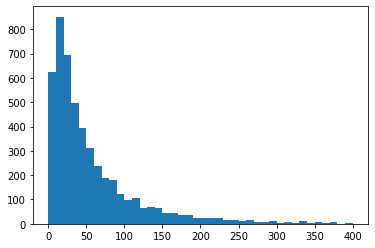

In [16]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

Pad comments to ensure all features are a fixed length.

In [17]:
maxlen = 300
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)

4) Build a long short-term memory network.

A number of parameters, or layers, have been included in this model:

<b> Embedding: </b> Important for natural language processing as it helps reduces the dimensionality of
discrete variables

<b> LSTM: </b> Adds sequence-prediction and neural-network capabilities

<b> GlobalMaxPool: </b> Reduces over-fitting

<b> Dense: </b> A dense layer is a fully connected layer where each 'neuron' is connected to all other variables
from the next layer.

The model will accept an input of data and will display the machine learning results

Sources:

https://towardsdatascience.com/deep-learning-4-embedding-layers-f9a02d55ac12

Gulli, Kapoor, Pal (2019). <i> Deep Learning with TenserFlow 2 and Keras </i>

In [18]:
inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier
embed_size = 128
x = Embedding(max_features, embed_size)(inp)
x = LSTM(60, return_sequences=True,name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dense(6, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

5) Input data into LSTM.

In [19]:
batch_size = 32
epochs = 20
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.3)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tensorflow/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


Train on 3500 samples, validate on 1500 samples
Epoch 1/20
3500/3500 [==============================] - 28s 8ms/step - loss: 0.2517 - accuracy: 0.9488 - val_loss: 0.1467 - val_accuracy: 0.9632

<b> Conclusions </b>

3500 comments were used as train data and 1500 comments were used as test/validation.

Each epoch indicates "one pass over the entire dataset" and is used as a marker
to separate the training into distinct phases.

As the model changes over time, the 'loss' and 'val_loss' decreases which indicates the
"average of the losses" over each batch of data is decreasing. 'loss' is applied to the train set while
'val_loss' is for the test or validation set.

Conversely, the 'acc' and 'val_acc' is increasing over time which represents the percentage of
instances that are correctly classified. 'acc' applies to the train set while the 'val_acc' is
for the test or validation set.

Overall, the model appears to have trained successfully and continued to improve over time.


Sources:


keras.io/getting_started/faq

Gulli, Kapoor, Pal (2019). <i> Deep Learning with TenserFlow 2 and Keras </i>


